# streamlined model

In [11]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch import nn
from torchvision import transforms
from torchinfo import summary
from going_modular.going_modular import data_setup, engine
from helper_functions import set_seeds, plot_loss_curves
from torchvision.models import efficientnet_b2, EfficientNet_B2_Weights
from helper_functions import plot_loss_curves
from going_modular.going_modular import data_setup


In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
def create_effnetb2_model(num_classes:int=3,
                          seed:int=42):
    weights = EfficientNet_B2_Weights.DEFAULT
    transforms = weights.transforms()
    model = efficientnet_b2(weights=weights)

    for param in model.parameters():
        param.requires_grad = False

    torch.manual_seed(seed)

    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=num_classes)
    )

    return model, transforms

In [23]:
effnetb2, effnetb2_transforms = create_effnetb2_model(num_classes=3, seed=42)

In [26]:
train_dir = 'data/pizza_steak_sushi_20_percent/train'
test_dir = 'data/pizza_steak_sushi_20_percent/test'

train_dir, test_dir

('data/pizza_steak_sushi_20_percent/train',
 'data/pizza_steak_sushi_20_percent/test')

In [27]:
#data loaders

train_dataloader_effnetb2, test_dataloader_effnetb2, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                 test_dir=test_dir,
                                                                                                 transform=effnetb2_transforms,
                                                                                                 batch_size=32)

In [28]:
len(train_dataloader_effnetb2), len(test_dataloader_effnetb2), class_names

(15, 5, ['pizza', 'steak', 'sushi'])

In [29]:
from going_modular.going_modular import engine

loss_fn = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=effnetb2.parameters(),
                             lr=0.001,
                             weight_decay=0.0001)

set_seeds()
effnetb2_results = engine.train(model=effnetb2,
                                train_dataloader=train_dataloader_effnetb2,
                                test_dataloader=test_dataloader_effnetb2,
                                epochs=10,
                                optimizer=optimizer,
                                loss_fn=loss_fn,
                                device=device)

 10%|█         | 1/10 [00:22<03:25, 22.84s/it]

Epoch: 1 | train_loss: 0.9832 | train_acc: 0.5750 | test_loss: 0.7411 | test_acc: 0.9409


 20%|██        | 2/10 [00:34<02:08, 16.02s/it]

Epoch: 2 | train_loss: 0.7182 | train_acc: 0.8479 | test_loss: 0.5867 | test_acc: 0.9347


 30%|███       | 3/10 [00:43<01:29, 12.83s/it]

Epoch: 3 | train_loss: 0.5841 | train_acc: 0.8958 | test_loss: 0.4877 | test_acc: 0.9625


 40%|████      | 4/10 [00:51<01:05, 10.93s/it]

Epoch: 4 | train_loss: 0.4470 | train_acc: 0.9125 | test_loss: 0.4332 | test_acc: 0.9409


 50%|█████     | 5/10 [00:59<00:50, 10.16s/it]

Epoch: 5 | train_loss: 0.4264 | train_acc: 0.9104 | test_loss: 0.3891 | test_acc: 0.9443


 60%|██████    | 6/10 [01:12<00:43, 10.81s/it]

Epoch: 6 | train_loss: 0.4468 | train_acc: 0.8812 | test_loss: 0.3500 | test_acc: 0.9688


 70%|███████   | 7/10 [01:18<00:27,  9.30s/it]

Epoch: 7 | train_loss: 0.4276 | train_acc: 0.8729 | test_loss: 0.3245 | test_acc: 0.9625


 80%|████████  | 8/10 [01:27<00:18,  9.17s/it]

Epoch: 8 | train_loss: 0.3817 | train_acc: 0.9042 | test_loss: 0.3441 | test_acc: 0.9352


 90%|█████████ | 9/10 [01:38<00:09,  9.81s/it]

Epoch: 9 | train_loss: 0.3741 | train_acc: 0.8833 | test_loss: 0.3112 | test_acc: 0.9256


100%|██████████| 10/10 [01:44<00:00, 10.41s/it]

Epoch: 10 | train_loss: 0.3711 | train_acc: 0.8625 | test_loss: 0.2806 | test_acc: 0.9625


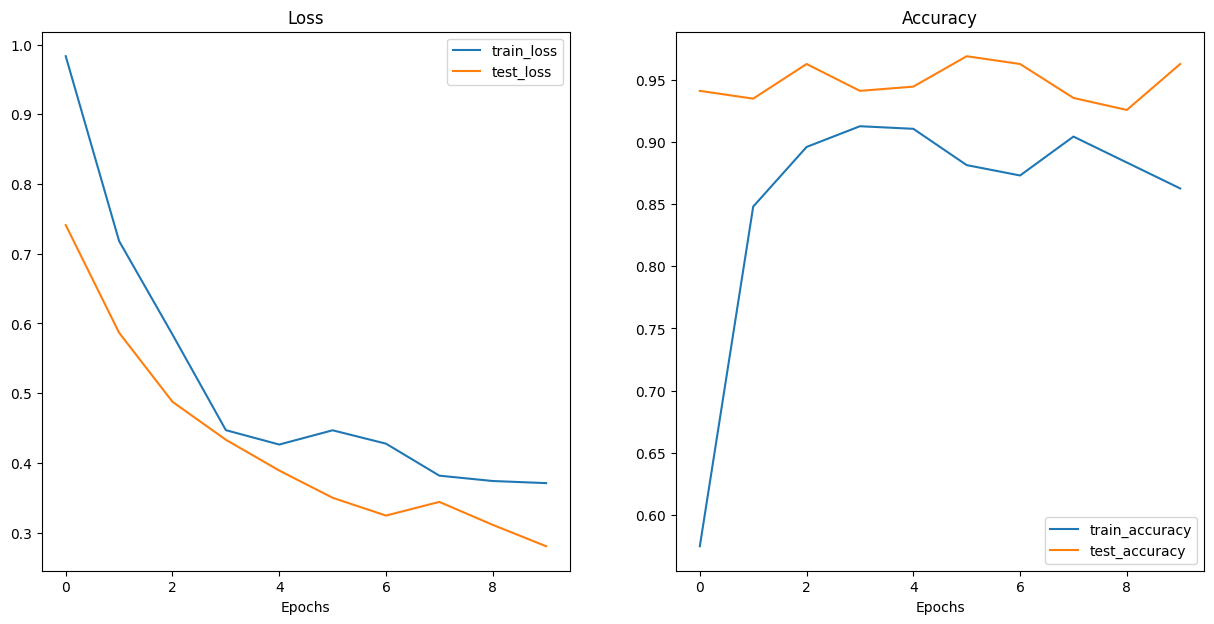

In [30]:
plot_loss_curves(effnetb2_results)